<a href="https://colab.research.google.com/github/Kiet2k2/phantichdulieu/blob/main/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÀI THỰC HÀNH TRÌNH BÀY DỮ LIỆU

Vấn đề 1:

In [ ]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/phantichdulieu/main/Data/covid19/'+filename)
dfcovid19 = load_data('countriessample.csv')
dfcovid19.head()

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0


# **Heat Map**

Example 1:

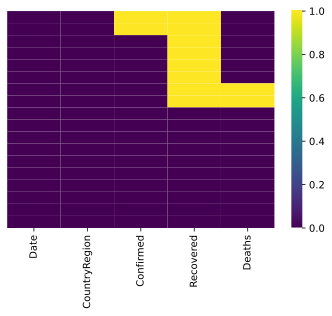

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

# **Apply function**

Example 2:Apply a function to each column of the dataframe 

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
})

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each subject
result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


Example 3:Apply a function to each row (axis = 1) of the dataframe

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each student
result = df.apply(get_mean, axis=1)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


Example 4: Define function to split CountryRegion into country and region

In [ ]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )

In [ ]:
def split_name(x_df):
    # Select the Name column and apply a function
    res=x_df['CountryRegion'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

# **pipe() function**

Example 5: Split CountryRegion into country and region by using slip_name function in example 4

In [ ]:
res=load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America


# **map() function**

Example 6:

In [ ]:
def substitute_region(x_df):
    mapping={'Africa':'AF', 'Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
    x_df['region']=x_df['region'].map(mapping)
    return x_df

In [ ]:
res=(res.pipe(substitute_region))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA


# **pandas.cut**

Example 7: Discretize into three equal-sized bins

In [ ]:
import pandas as pd
import numpy as np
a = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

In [ ]:
a

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

Example 8:Discovers the same bins, but assign them specific labels. Notice that the returned Categorical’s categories are labels and is ordered

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]),bins = 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

Example 9: ordered=False will result in unordered categories when labels are passed. This parameter can be used to allow non-unique labels:

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

Example 10: Convert confirmed cases into 3 catorories: normal (<3000), medium ( <5000), and worst (>5000)

In [ ]:
def create_evaluation_group(x_df):
    bins=[0.0, 3000, 5000, sys.maxsize]
    labels=['normal', 'medium', 'worst']
    evaluationGroup=pd.cut(x_df['Confirmed'], bins=bins, labels=labels,include_lowest=True)
    x_df['Evaluation']=evaluationGroup
    return x_df


In [ ]:
res=(res.pipe(create_evaluation_group))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region,Evaluation
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF,NaN
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU,NaN
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU,normal
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS,normal
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS,normal
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS,normal
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS,normal
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU,normal
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF,medium
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA,normal


# Phần 1: Thống kê dữ liệu

In [7]:
import pandas as pd
import numpy as np
dftuyensinh =pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/dulieuxettuyendaihoc.csv",index_col="STT")
print("Cau 1 :\n")
print(dftuyensinh)
print("Cau 2:\n")
print("Thay thế các cột có giá trị 0:\n")
print(dftuyensinh.fillna(0,inplace=False))
print("Câu 3:\n")
print("In ra 10 dòng đầu:\n",dftuyensinh.head(10))
print("In ra 10 dòng cuối:\n")
print(dftuyensinh.tail(10))
print("Câu 4:\n")
print("Chỉnh dữ liệu thiếu tại dân tộc bằng 0:\n")
print(dftuyensinh['DT'].fillna(0,inplace=False))
print("Câu 5:\n")
print("Hiệu chỉnh dữ liệu bằng mean:\n")
print(dftuyensinh['T1'].fillna(dftuyensinh["T1"].mean(),inplace=False))
print("Câu 6:\n")
print("Sử lý dữ liệu thiếu của các cột điểm số:\n")
print(dftuyensinh.isnull().values.any())
print("Thống kê dữ liệu các cột:\n",dftuyensinh.dtypes)
is_float64=dftuyensinh.dtypes==float
#Chuyển các giá trị thành list
df_column_list=dftuyensinh.columns[is_float64].tolist()
print("Danh sách cột cảu bảng có giá trị float , các cột có dữ liệu là chứ bỏ qua: \n",df_column_list)
def fill(col):
    return dftuyensinh[col].fillna(dftuyensinh[col].mean(),inplace=False)
for col in df_column_list:
    fill(col)
print("Bảng sau khi hiệu chỉnh:\n",dftuyensinh)
print("Câu 7:\n")
for i in ['1','2','6']:
    dftuyensinh["TBM"+i] = (dftuyensinh["T"+i]*2 + dftuyensinh["L"+i]+ dftuyensinh["H"+i]+ dftuyensinh["S"+i]+ + dftuyensinh["V"+i]*2 + dftuyensinh["X"+i]+ dftuyensinh["D"+i]+ dftuyensinh["N"+i])/10
#Đổi tên cột
dftuyensinh.rename(columns={"TBM6":"TBM3"},inplace = True)
print("Dứ liệu sau khi thêm tào các cột TBM:\n",dftuyensinh)
print("Câu 8:Xếp loại\n")
for i in ["1","2","3"]:
    dftuyensinh.loc[dftuyensinh['TBM'+i]<=5,'XL'+i]='Y'
    dftuyensinh.loc[(dftuyensinh['TBM'+i]<=6.5) & (dftuyensinh['TBM'+i]>5),'XL'+i]='TB'
    dftuyensinh.loc[(dftuyensinh['TBM'+i]<=8) & (dftuyensinh['TBM'+i]>6.5),'XL'+i]='K'
    dftuyensinh.loc[(dftuyensinh['TBM'+i]<=9) & (dftuyensinh['TBM'+i]>8),'XL'+i]='G'
    dftuyensinh.loc[dftuyensinh['TBM'+i]>=9,'XL'+i]='XS'

print(dftuyensinh)
print("Câu 9:\n")
for i in ['1','2','3']:
    dftuyensinh["US_TBM"+i] = dftuyensinh["TBM"+i]/10 *4

print(dftuyensinh)
print("Câu 10:\n")
for i in dftuyensinh['KT'].unique():
    str(i)
    dftuyensinh.loc[(i == "Al" or i == "A") & (((dftuyensinh["DH1"]*2 + dftuyensinh["DH2"] + dftuyensinh["DH3"])/4) >= 5), "KQXT"] = 1#điều kiện lọc có th
    dftuyensinh.loc[(i == "Al" or i == "A") & (((dftuyensinh["DH1"]*2 + dftuyensinh["DH2"] + dftuyensinh["DH3"])/4) < 5), "KQXT"]  = 0
    dftuyensinh.loc[(i== "B") & (( (dftuyensinh["DH1"] + dftuyensinh["DH2"]*2 + dftuyensinh["DH3"])/4) >= 5), "KQXT"] = 1 
    dftuyensinh.loc[(i == "B") & (( (dftuyensinh["DH1"] + dftuyensinh["DH2"]*2 + dftuyensinh["DH3"])/4) < 5), "KQXT"] = 0
    dftuyensinh.loc[ (i != "A1" or i != "A" or i ==  "B") & (((dftuyensinh["DH1"] + dftuyensinh["DH2"] + dftuyensinh["DH3"])/3) >= 5), "KQXT"] = 1
    dftuyensinh.loc[ (i != "A1" or i != "A" or i ==  "B") & (((dftuyensinh["DH1"] + dftuyensinh["DH2"] + dftuyensinh["DH3"])/3) < 5), "KQXT"] = 0
print(dftuyensinh.head(10))
print("Cau 11")
dftuyensinh.to_csv('processed_dulieuxettuyendaihoc.csv')

Cau 1 :

      T1   L1   H1   S1   V1   X1   D1   N1   T2   L2  ...   X6   D6   N6  GT  \
STT                                                    ...                      
1    7.2  7.3  6.3  7.3  7.0  7.9  7.3  5.5  8.4  8.9  ...  6.6  7.6  5.9   F   
2    5.4  3.9  3.9  4.0  5.4  5.4  5.3  2.8  6.3  5.4  ...  6.6  6.1  4.4   M   
3    5.6  6.8  7.2  7.5  4.3  7.4  5.8  3.2  5.0  4.9  ...  7.9  8.1  4.6   M   
4    6.6  6.4  5.3  6.9  5.4  7.3  6.4  5.8  5.1  6.2  ...  7.1  7.3  7.4   M   
5    6.0  5.0  6.0  7.3  6.5  7.7  7.9  6.1  5.4  5.5  ...  6.1  7.5  7.2   M   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..   
96   8.6  6.9  7.4  8.8  7.6  5.8  7.3  5.7  8.9  6.8  ...  6.3  6.1  6.2   F   
97   3.7  5.4  6.0  5.1  5.5  3.9  6.1  4.4  4.1  4.8  ...  7.9  7.5  4.4   F   
98   8.8  5.5  7.4  7.7  6.2  7.3  8.1  4.5  9.5  7.3  ...  9.6  8.4  5.8   M   
99   2.7  1.8  3.4  5.3  4.5  7.9  4.9  3.8  2.8  5.7  ...  6.6  5.2  5.9   M   
100  4.1  5.2  4.9 

In [8]:
#1 Groupby trên 1 cột
print("Kết quả thống kê theo cột giới tính:\n",dftuyensinh.groupby("GT")["T1"].count())#lấy cột GT để group, đếm theo cột T1
#2. groupby trên nhiều cột và điều kiện trên 1 cột kết quả
#print ("Kết quả thống kê theo giới tính và Khối thi (Cộng bản ghi trên cột T1):\n",dftuyensinh.groupby (['GT','KT']) ['T
print ("Kết quả groupby theo 2 cột GT, KT trên T1")
ketqua = dftuyensinh.groupby(["GT","KT"])["T1"].count().reset_index(name="Tong cong")
print(ketqua)
ketqua_locgroup= ketqua[(ketqua["Tong cong"]>5)] #having cột count sau khi groupby
print("Having trong groupby:\n",ketqua_locgroup)
#3. Groupby trên nhiều cột và nhiều hàm. Do cần nhiều hàm nên bắt buộc phải dùng thuộc tính .agg
###Group records by GT, perform count and average on T1, and SUM on T1
##dept_agg = dftuyensinh.groupby ('GT').agg({'T1':['count', 'mean'],'T1':'sum'})
#print ("nhiều hàm trên group:\n", dept_agg)
#####Rename columns
##dept agg.columns = ['GT','count','mean','sum']
##print (dept_agg.reset_ index ())
groupby_nhieuham=dftuyensinh.groupby (['GT']
                                              ).agg (count_T1 = ('T1','count'),
                                                     sum_T1 = ('T1','sum')
                                                    ).reset_index ()
print ("groupy một cột nhiều hàm:\n",groupby_nhieuham)
groupby_nhieuham_nhieucot=dftuyensinh.groupby (['GT', 'KT']
                                             ). agg (count_T1 = ('T1','count'),
                                                    sum_T1 = ('T1','sum')
                                                  ). reset_index ()
print ("groupy nhiều hàm nhiều cột:\n",groupby_nhieuham_nhieucot)
having_2ham=groupby_nhieuham_nhieucot[groupby_nhieuham_nhieucot['count_T1']>2]
print ("Điều kiện trên hàm group by (1 điều kiện):\n",having_2ham)

print ("Cau 1: Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần")
print ("a. Dữ liệu trước khi sắp xếp: \n",dftuyensinh[['GT','DH1']].head (10)) #hiển thị cột ít lại để kiểm tra kết quả
df_sapxep=dftuyensinh[["GT","DH1"]].head(10)
#sort_DH1=dftuyensinh.sort_values (by='DH1') #sort_DH1=dftuyensinh.sort_values ('DH1')
sort_DH1=df_sapxep.sort_values(by="DH1")
print("Dữ liệu sau khi sắp xếp:\n",sort_DH1)
print ("Cau 2: Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính")
print("Dữ liệu trước khi sắp xếp:\n", dftuyensinh[['GT','DH2']].head(10))
df_sapxep=dftuyensinh[['GT','DH2']].head (10)
sort_DH1_GT=df_sapxep.sort_values (['GT','DH2'])
#F đuợc xếp trước, M được xếp sau, Ở khúc dữ liệu GT-F, DH2 được xếp tăng dần
print ("Dữ liệu sau khi sắp xếp:\n",sort_DH1_GT)
print("Câu 3: 3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median,min, max, sdt,Q1,Q2,Q3 ")
def get_mean(scores):
       return sum(scores)/len(scores)
# get mean score for each subject 
result=dftuyensinh['D1'].sum()
print("\n The result of applying the function on the dâtframe:\n")
print(result)
def Q1(g):
       return np.percentile(g,25)
def Q2(g):
       return np.percentile(g,50)
def Q3(g):
       return np.percentile(g,75)
def std(g):
       return np.std(g)
print("Bảng giá trị theo DH và KT :\n",dftuyensinh[['DH1','KT']])
print("Pivot table theo cảu DH1 theo KT:\n ",pd.pivot_table(data=dftuyensinh,index='KT',values='DH1',aggfunc=['sum','mean','median',std,Q1,Q2,Q3]))

Kết quả thống kê theo cột giới tính:
 GT
F    48
M    52
Name: T1, dtype: int64
Kết quả groupby theo 2 cột GT, KT trên T1
  GT  KT  Tong cong
0  F   A         15
1  F  A1          5
2  F   B          4
3  F   C          8
4  F  D1         16
5  M   A         34
6  M  A1          1
7  M   B          5
8  M   C          6
9  M  D1          6
Having trong groupby:
   GT  KT  Tong cong
0  F   A         15
3  F   C          8
4  F  D1         16
5  M   A         34
8  M   C          6
9  M  D1          6
groupy một cột nhiều hàm:
   GT  count_T1  sum_T1
0  F        48   297.0
1  M        52   297.6
groupy nhiều hàm nhiều cột:
   GT  KT  count_T1  sum_T1
0  F   A        15    99.2
1  F  A1         5    35.3
2  F   B         4    21.2
3  F   C         8    39.1
4  F  D1        16   102.2
5  M   A        34   198.6
6  M  A1         1     4.3
7  M   B         5    28.4
8  M   C         6    31.9
9  M  D1         6    34.4
Điều kiện trên hàm group by (1 điều kiện):
   GT  KT  count_T1  sum_T1
0 

# Phần 2: Trình bày dữ liệu

Phần 2: Trình bày dữ liệu
1. Hãy trình bày dữ liệu biến GT
Lập bảng tần sỐ, tần suất
STT
1      False
2      False
3      False
4      False
5      False
       ...  
96     False
97     False
98     False
99     False
100    False
Name: GT, Length: 100, dtype: bool


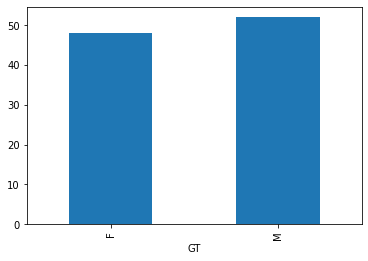

lb. Biểu đồ tròn tần suất


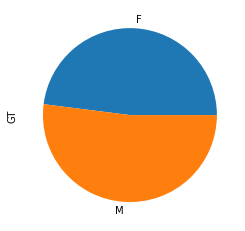

lb. Biểu đồ tròn tần suất


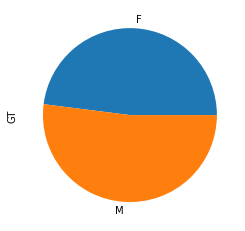

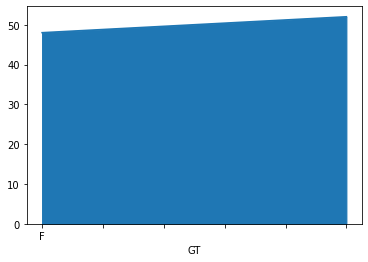

23 Hãy trình bày dữ liệu biến DT với các học sinh là nam
DT
1.0    1
6.0    1
Name: DT, dtype: int64
3.1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked
Gom nhóm dữ liệu học sinh nữ theo XL1, XL2 và XL3 trước khi unstack:
              GT
XL1 XL2 XL3    
G   G   G     1
K   G   K     1
    K   K    20
        TB    1
    TB  K     2
TB  K   K     7
        TB    1
    TB  K     4
        TB    6
Y   TB  K     1
        TB    3
    Y   TB    1
Dữ liệu sau khi unstack:
           GT           
XL3        G     K   TB
XL1 XL2                
G   G    1.0   NaN  NaN
K   G    NaN   1.0  NaN
    K    NaN  20.0  1.0
    TB   NaN   2.0  NaN
TB  K    NaN   7.0  1.0
    TB   NaN   4.0  6.0
Y   TB   NaN   1.0  3.0
    Y    NaN   NaN  1.0


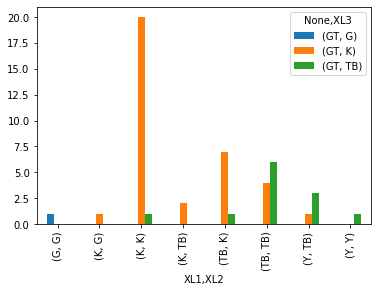

In [9]:
print ("Phần 2: Trình bày dữ liệu")
print ("1. Hãy trình bày dữ liệu biến GT")
print ("Lập bảng tần sỐ, tần suất")
print (dftuyensinh ["GT"].isnull())
gt = dftuyensinh.groupby(by='GT') [ 'GT'].agg ('count')
import matplotlib.pyplot as plt
gt.plot.bar() 
plt.show()
print ("lb. Biểu đồ tròn tần suất")
gt.plot.pie ()
plt.show ()
print ("lb. Biểu đồ tròn tần suất")
gt.plot.pie ()
plt.show ()
gt.plot.area () #linewidth=D0, colormap="Pastel1"
plt.show ()
print("23 Hãy trình bày dữ liệu biến DT với các học sinh là nam")
cau3 = dftuyensinh[dftuyensinh['GT'] == 'M']
print(cau3.groupby('DT')['DT'].agg('count'))
print("3.1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked")
cau31 = dftuyensinh[dftuyensinh['GT'] == 'F'].groupby(['XL1', 'XL2', 'XL3'])[['GT']].count()#nếu để XL6 thì không plot.bar được
print("Gom nhóm dữ liệu học sinh nữ theo XL1, XL2 và XL3 trước khi unstack:\n",cau31)
cau31.unstack()
print("Dữ liệu sau khi unstack:\n",cau31.unstack())
cau31.unstack().plot.bar()
plt.show()

# Phần 4: Trực quan hóa dữ liệu nâng cao


# Phần 4: Trực quan hóa dữ liệu nâng cao
1. Vẽ biểu đồ đường Simple cho biến T1
Dữ liệu tổng hợp groupby:
 T1
2.4    1
2.5    1
2.6    1
2.7    1
2.8    1
3.0    2
3.4    1
3.6    2
3.7    1
3.9    1
4.1    1
4.2    1
4.3    1
4.4    1
4.5    1
4.6    1
4.7    1
4.8    1
4.9    3
5.0    3
5.1    2
5.2    5
5.3    5
5.4    3
5.5    3
5.6    2
5.7    2
5.8    2
5.9    1
6.0    4
6.1    1
6.2    1
6.3    3
6.4    2
6.5    3
6.6    2
6.7    1
6.9    1
7.0    1
7.1    2
7.2    4
7.3    5
7.5    1
7.6    1
7.8    1
7.9    4
8.1    2
8.2    3
8.3    2
8.4    1
8.6    1
8.8    2
9.3    1
Name: T1, dtype: int64


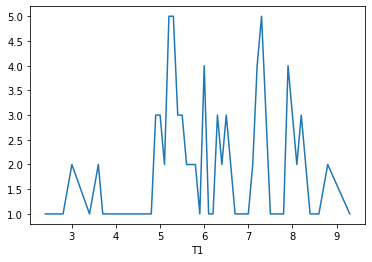

Câu 2 phần 4:
      T1   L1   H1   S1   V1   X1   D1   N1   T2   L2  ...  TBM2  TBM3  XL1  \
STT                                                    ...                    
1    7.2  7.3  6.3  7.3  7.0  7.9  7.3  5.5  8.4  8.9  ...  7.54  7.01    K   
2    5.4  3.9  3.9  4.0  5.4  5.4  5.3  2.8  6.3  5.4  ...  5.47  5.07    Y   
3    5.6  6.8  7.2  7.5  4.3  7.4  5.8  3.2  5.0  4.9  ...  5.38  6.04   TB   
4    6.6  6.4  5.3  6.9  5.4  7.3  6.4  5.8  5.1  6.2  ...  5.20  6.88   TB   
5    6.0  5.0  6.0  7.3  6.5  7.7  7.9  6.1  5.4  5.5  ...  6.36  6.99   TB   

     XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT  phanlopt1  
STT                                                        
1      K    K    2.800    3.016    2.804   0.0        kha  
2     TB   TB    1.876    2.188    2.028   0.0  trungbinh  
3     TB   TB    2.308    2.152    2.416   1.0  trungbinh  
4     TB    K    2.484    2.080    2.752   0.0  trungbinh  
5     TB    K    2.600    2.544    2.796   0.0  trungbinh  

[5 rows x 6

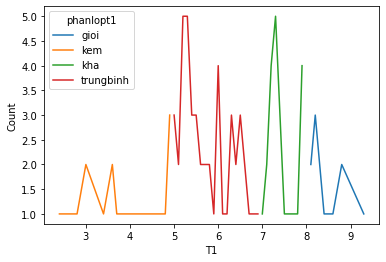

4.5 Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1


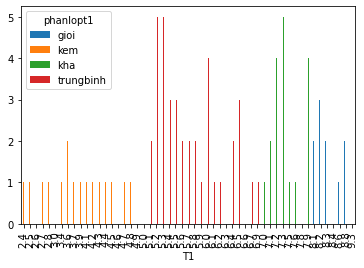

In [10]:
print("# Phần 4: Trực quan hóa dữ liệu nâng cao")
print("1. Vẽ biểu đồ đường Simple cho biến T1")
print("Dữ liệu tổng hợp groupby:\n",dftuyensinh.groupby('T1')['T1'].count())
dftuyensinh.groupby('T1')['T1'].count().plot()# Thay vì dùng .bar, .pie... thì chỉ dùng plot là đường simple
plt.show()
print("Câu 2 phần 4:")
##2. Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau:
##
##a. Từ 0 đến dưới 5 = kém (ký hiệu "k")
##
##b. Từ 5 đến dưới 7 = trung bình (ký hiệu "tb")
##
##c. Từ 7 đến dưới 8 = khá (ký hiệu "k")
##
##d. Từ 8 trở lên = giỏi (ký hiệu "g")
##
dftuyensinh.loc[(dftuyensinh['T1'] < 5), 'phanlopt1'] = 'kem'
dftuyensinh.loc[(dftuyensinh['T1'] >=5) & (dftuyensinh['T1'] <7), 'phanlopt1'] = 'trungbinh'
dftuyensinh.loc[(dftuyensinh['T1'] >=7) & (dftuyensinh['T1'] <8), 'phanlopt1'] = 'kha'
dftuyensinh.loc[(dftuyensinh['T1'] >= 8), 'phanlopt1'] = 'gioi'
print(dftuyensinh.head(5))
print("3. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1")
print("Lập bảng tần số, tần suất")
print(dftuyensinh["phanlopt1"].isnull())
#gt = dftuyensinh.groupby(by='GT')['GT'].agg('count')
dfphanlopt1 = dftuyensinh.groupby(['T1', 'phanlopt1'])[['T1', 'phanlopt1']].count()
print(dfphanlopt1.head(10))
#lưu ý phải unstack 1 biến để vẽ 1 biến theo trục hoành và 1 biến theo trục tung
unstackphanlopt1 = dfphanlopt1.unstack()
print(unstackphanlopt1.head(10))
unstackphanlopt1['phanlopt1'].plot(ylabel='Count')
plt.show()
print("4.5 Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1")
unstackphanlopt1['phanlopt1'].plot.bar()
plt.show()